<a href="https://colab.research.google.com/github/DiegoLLP123/upsrj-keras-workspace/blob/main/DNN_LINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Red Densa con Keras para predicción Lineal"
## Objetivo
Implementar una red neuronal completamente correcta (DNN) simple usando Keras, para predecir la resistencia del concreto (Strength) a partir de sus componentes quimicos.


1. "Cargar y preparar los datos"
Usaremos el dataset de ejemplo de UC Irvine. Para ello seguiremos los pasos del **README.md** de [[ucimlrepo.package](https://github.com/uci-ml-repo/ucimlrepo)].

In [1]:
import pandas as pd
# URL del Dataset a utilizar
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
# Cargar datos del URL
data = pd.read_excel(url)
# Mostrar las primeras filas
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Necesitamos ahora separar los predictores y la variable objetivo de nuestra base de datos.

Para ello, seleccionaremos la columna **"Concrete compressive strength(MPa, megapascals)"** como nuestro selector, y el resto como nuestros predictores.

In [7]:
# Separar predictores
predictors = data.drop(columns=["Concrete compressive strength(MPa, megapascals) "])
predictors.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
# Columna de Strength
strength_column = "Concrete compressive strength(MPa, megapascals) "

In [9]:
# Separar selector
predictors = data.drop(columns=[strength_column])
predictors.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
# Separar Selector
selector = data[strength_column]
selector.head()

,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075


In [13]:
# Obtenemos el número de columnas de nuestros predictores
n_cols = predictors.shape[1]
print(n_cols)

8


2. **Definir el modelo**

Necesitamos generar un modelo secuencial con una red neuronal densa (DNN) con una capa de entrada, una capa oculta y una capa de salida.

La capa de salida contendra solo una neurona sobre la cual va a divergir todo el contenido de la capa previa.

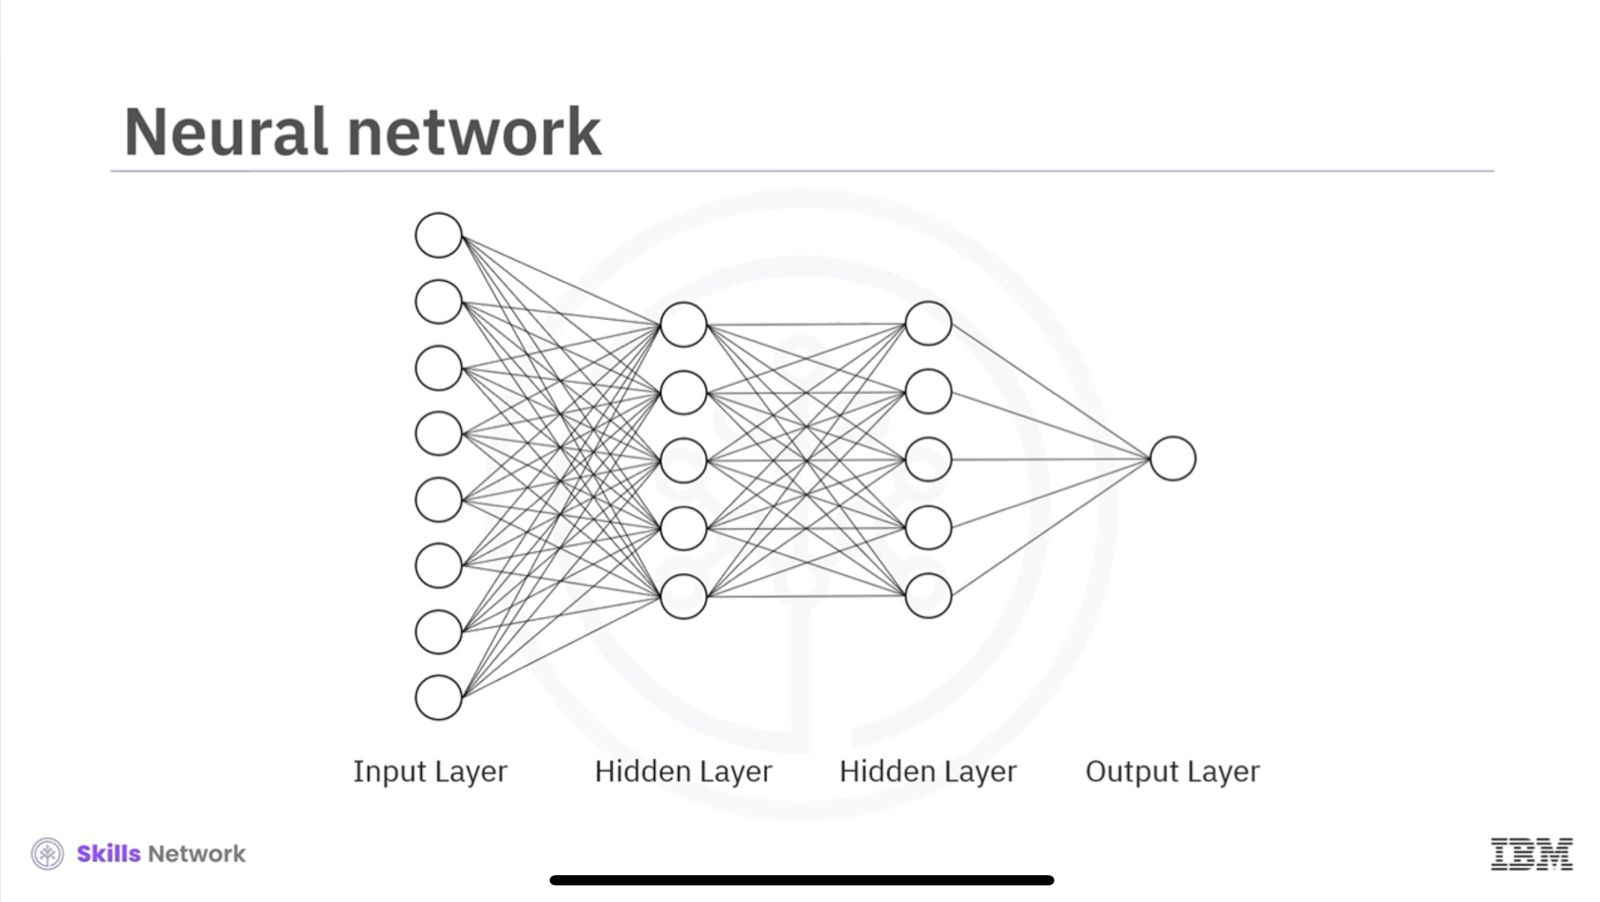

In [17]:
from keras.models import Sequential
from keras.layers import Dense

# Creamos un modelo sequencial
model = Sequential()

# Definimos capa de entrada
model.add(Dense(5, activation='relu', input_shape=(n_cols, )))

# Definimos capa oculta
model.add(Dense(5, activation='relu'))

# Definimos capa de salida (una sola neurona)
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. **Entrenar y evaluar**

Necesitamos ingresar el contenido del dataset a nuestra red DNN para obtener un resultado.

Posteriormente necesitamos generar una predicción con el modelo alimentado, y evaluar que tan efectivo es nuestro modelo para predecir variables.

In [24]:
#  Entrenamiento
history = model.fit(predictors, selector, epochs=50, verbose=1)

# Predicción (con low primeros elementos de los predictores)
predictions = model.predict(predictors)
print(predictions)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.3616
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.7712
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.0694
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.8360
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130.0993
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123.7267
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.2655
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.4017
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.8017
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.3034
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.8326
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116.8274
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.9841
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.7292
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

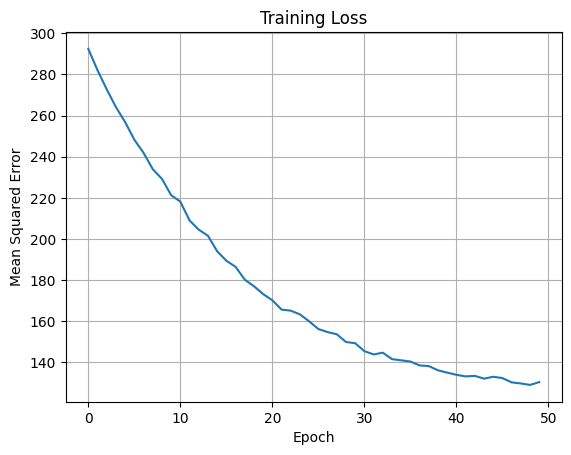

In [23]:
import matplotlib.pyplot as plt

# Gráfico de perdida
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

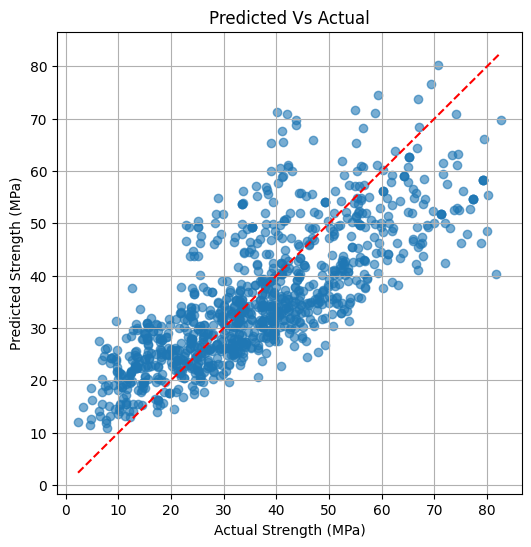

In [25]:
# Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(selector, predictions, alpha=0.6)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Predicted Vs Actual')
plt.grid(True)
plt.plot([selector.min(), selector.max()], [selector.min(), selector.max()], 'r--')
plt.show()

## **Ejercicio: Mejorar una red densa con Keras**

## Objetivo

Predecir la resistencia del concreto, mejorando la red original mediante:
- Más capas ocultas
- Más epochs
- Integración de funciones de activación no líneales (sigmoidea)

## Instrucciones
1. Aumenta la densidad de la capa de entrada de 8 a 10 nodos.
2. Modifica las capas ocultas de la red para que sean 3, con el siguiente número de nodos respectivamente: 10, 8, 6.
3. Cambia la función de activación de la capa de salida por una sigmoidea ("sigmoid").
4. Alimenta la red con un valor de 200 epochs.

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 104166.6562
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35224.0078
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14509.6582
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4648.4839
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 719.9800
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 437.4665
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 371.5143
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 318.8139
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 326.1525
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307.7986
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 306.8151
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281.0805
Epoch 13/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.7985
Epoch 14/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 282.6319
Epoch 15/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

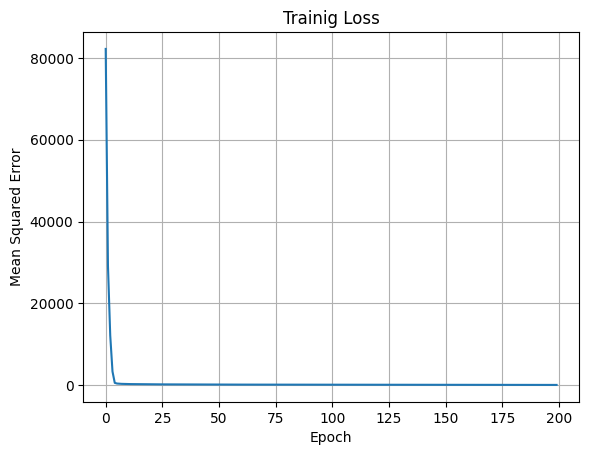

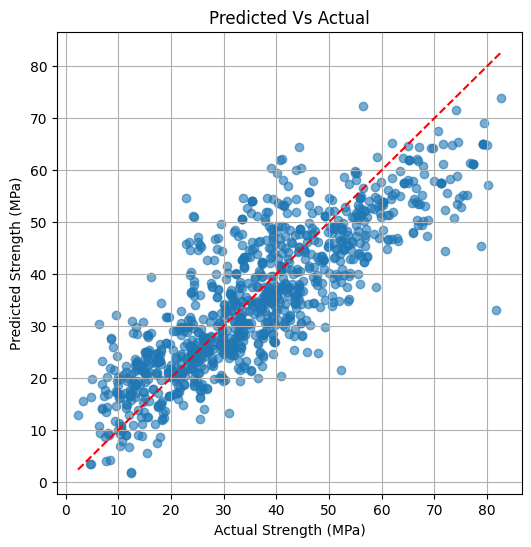

In [34]:
model_improved = Sequential()

# Input layer
model.add(Dense(10, activation='relu', input_shape=(n_cols, )))
# Hidden layers
model_improved.add(Dense(10, activation='relu'))
model_improved.add(Dense(8, activation='relu'))
model_improved.add(Dense(6, activation='relu'))
# Output layer
model_improved.add(Dense(1, activation='linear'))

model_improved.compile(optimizer='adam', loss='mean_squared_error')

#Entrenamiento
history_improved = model_improved.fit(predictors, selector, epochs=200, verbose=1)

#Predicción (con los primeros elementos de los predictores)
prediction_improved = model_improved.predict(predictors)

# Gráfico de perdida
plt.plot(history_improved.history['loss'])
plt.title('Trainig Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

#Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(selector, prediction_improved, alpha=0.6)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Predicted Vs Actual')
plt.grid(True)
plt.plot([selector.min(), selector.max()], [selector.min(), selector.max()], 'r--')
plt.show()